# Predictive Analytics

In this notebook we are going to present the machine learning pipeline. A pipeline is simply a set of steps taken in an experiment.

## 01 - Data Acquisition

Locate the dataset file(s) and load it

In [1]:
import pandas as pd

data = pd.read_csv('icecream.csv')

## 02 - Data exploration

Explore the dataset in a statistical manner.

In [2]:
data.info() # Provides some general information about rows, columns and datatypes.
data.head() # Provides a preview of the dataset by displaying the first 5 rows.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  26 non-null     float64
 1   Sales        26 non-null     float64
dtypes: float64(2)
memory usage: 564.0 bytes


,Temperature,Sales
0,40.0,72.0
1,35.0,68.0
2,35.0,68.0
3,32.0,64.0
4,31.0,64.0


In [3]:
data.describe() # Give a wholistic and statisitical overview of the data set

,Temperature,Sales
count,26.000000,26.000000
mean,35.038462,67.000000
std,4.218822,6.480741
min,28.000000,42.000000
25%,32.250000,64.500000
50%,35.000000,68.000000
75%,38.750000,70.000000
max,41.000000,76.000000


In [4]:
print('Temperature\n\tMin {:.2f}\n\tMax {:.2f}\n\tAverage {:.2f}'.format(
    data.Temperature.min(), 
    data.Temperature.max(),
    data.Temperature.mean()))

print('\nSales\n\tMin {:.2f}\n\tMax {:.2f}\n\tAverage {:.2f}'.format(
    data.Sales.min(), 
    data.Sales.max(),
    data.Sales.mean()))

Temperature
	Min 28.00
	Max 41.00
	Average 35.04

Sales
	Min 42.00
	Max 76.00
	Average 67.00


## Data Visualisation

Visualise the dataset to identify patterns and form an opinion.

Text(0.5, 1.0, 'Sales Distribution')

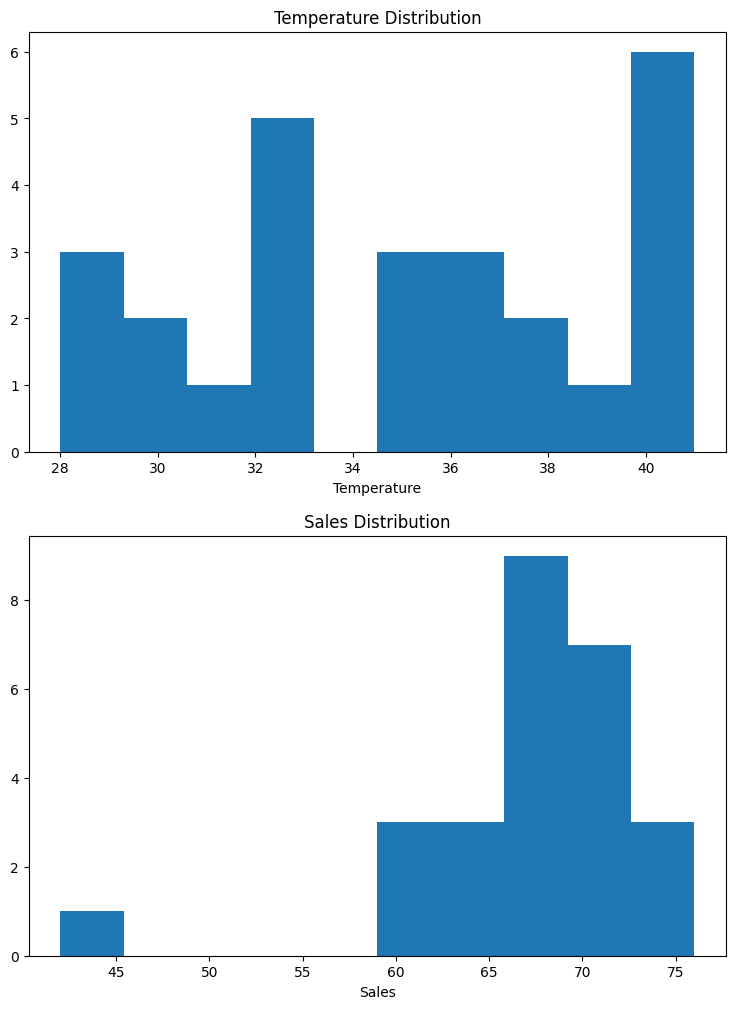

In [5]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(2, 1, figsize=(9, 12))

ax[0].hist(data.Temperature)
ax[0].set_xlabel("Temperature")
ax[0].set_title('Temperature Distribution')

ax[1].hist(data.Sales)
ax[1].set_xlabel("Sales")
ax[1].set_title('Sales Distribution')

The temperature histogram demonstrates that the dataset is not balanced and it does not follow a normal distribution.<br /><br />
The sales histogram demosntrates that the dataset is not balanced and it does not follow a normal distribution.

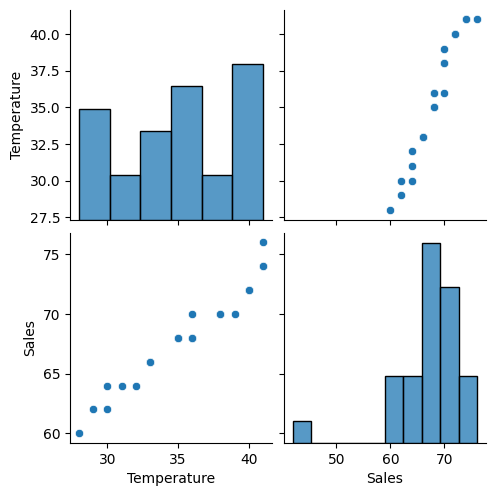

In [6]:
import seaborn as sns

sns.pairplot(data)

Note: Please note that all variables are listed on the left side (Y-Axis) and the bottom side (X-Axis), thus it is called a pair plot.<br />

Note: Please note that where the same variable meets you get a histogram and where the variables are paired a scatter plot is shown.<br />

Note: Please note that the histogram is less accurate that the plot shown using matplotlib.<br />

Referring to the Sales vs Temperature scatter plot shown in the lower left corner we note that a linear regression (straight line) model is appropriate. <br />

Note: Remember that the predictor (Temperature) should be on the x-axis, whilst the target (Sales) on the Y-Axis.

<Axes: >

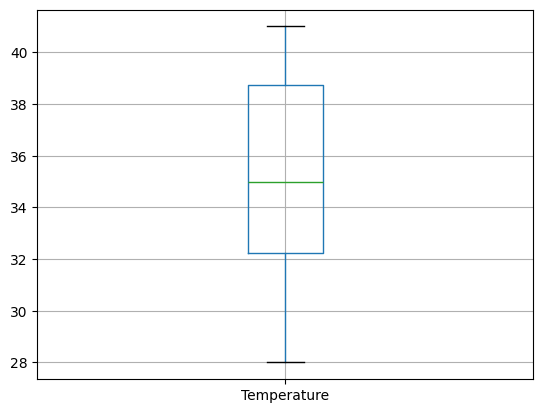

In [7]:
data.boxplot(column="Temperature")

<Axes: >

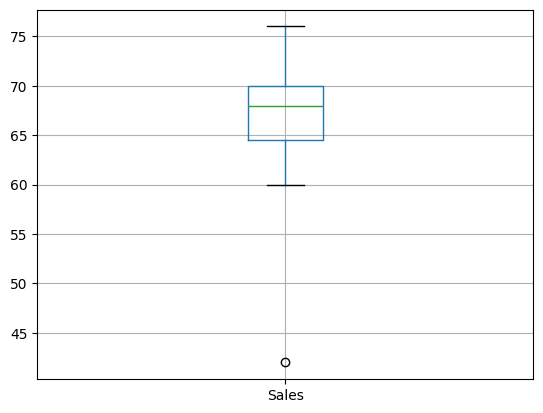

In [8]:
data.boxplot(column="Sales")

The above two illustrations are boxplots which show the presence of outliers. These are represented as dots, which the Temperature variable does not have, but the Sales does have one outlier.

This means that for a specific day the sales of ice-cream were outside of normality.

## Data cleaning and transformation

In [9]:
# Look for missing values (nulls)
data.isnull().sum()

Temperature    1
Sales          1
dtype: int64

In [10]:
# Display the rows with missing values
data[data.isnull().any(axis=1)]

,Temperature,Sales
23,NaN,42.0
24,28.0,NaN


In [11]:
# Remove all rows that have missing values
data = data.dropna(axis=0, how='any')
data.isnull().sum()

Temperature    0
Sales          0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 0 to 26
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  25 non-null     float64
 1   Sales        25 non-null     float64
dtypes: float64(2)
memory usage: 600.0 bytes


<Axes: >

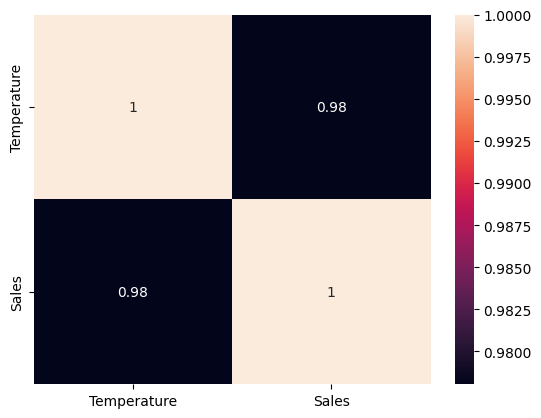

In [13]:
# Check the correlation between variables
sns.heatmap(data.corr(), annot=True)

From the above heatmap we can observe that the correlation between temperature and sales is +0.98, this means that there is a strong and positive correlation between the predictor (temperature) and the target (sales).

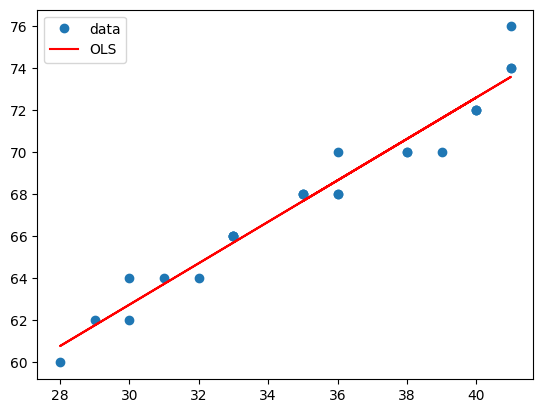

In [14]:
import statsmodels.formula.api as smf
import statsmodels.api as sum

# Create the linear regression Y=mx+c
formula = "Sales ~ Temperature"

# Create the model
model = smf.ols(formula=formula, data=data).fit()

# Plot the model
plt.plot(data.Temperature, data.Sales, 'o', label='data')
plt.plot(data.Temperature, model.fittedvalues, color='red', label='OLS')
plt.legend(loc='best')

## Model evaluation

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     506.8
Date:                Thu, 14 Dec 2023   Prob (F-statistic):           3.61e-17
Time:                        09:18:11   Log-Likelihood:                -30.918
No. Observations:                  25   AIC:                             65.84
Df Residuals:                      23   BIC:                             68.27
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      33.1684      1.557     21.303      0.000      29.948      36.389
Temperature     0.9862      0.044     22.512      0.000       0.896       1.077
==============================================================================
Omnibus:                        5.373   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                3.391
Skew:                           0.759   Prob(JB):                        0.183
Kurtosis:                       3.975   Cond. No.                         319.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The above table shows us statistical information about our model. We first look at the Prob(F-Statistic) which tells us whether we accept or reject this model. To accept the model the value must be less than 0.05 (5%). Our model is 3.61e-17 (e-17 is scientific notation for 10 to the power of -17, so the decimal point moves 17 times to the left). With such a small value, much less than 0.05 we accept this model.

Next we look at the R-squared value, which can between 0 and 1. The closer to 1 the better the model. With a value of 0.957 this is a very good model.

Finally, we look at the coefficients to complete the y=mX+c formula, we note that m is 0.9862 and c is 33.1684.

## Prediction

In [19]:
def estimate_sales(m, temperature, c):
    return m*temperature + c

print('Expected sales when temperature is 40 degrees is {:0.0f}' \
      .format(estimate_sales(model.params[1], 40, model.params[0])))

Expected sales when temperature is 40 degrees is 73


c:\Temp\ipykernel_10432\1350328184.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  .format(estimate_sales(model.params[1], 40, model.params[0])))


In the above we created a function that takes 3 parameters, the coefficient of the predictor (temperature), the actual predictor (temperature), and the coeffiecient of the Y-intercept. To access the coefficients refer to the model.summary() output and locate the position number. The coefficient of Y-intercept is usually the first thus accessed using model.params[0], then the coefficient of the predictor(s) is accessed using the next index number. In our case temperature is the next soits coefficient is accessed by model.params[1]. We predict that when temperature is 40 degrees we sell 73 ice-creams.